In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [8]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [9]:
clf = DecisionTreeClassifier()

In [10]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [11]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [12]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6303208137715179

In [13]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [14]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [15]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [16]:
trf.named_transformers_['second'].n_bins_

array([15])

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [19]:
output['age_labels'] = pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [20]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
871,47.0,13.0,52.5542,12.0,"(42.0, 47.0]","(51.479, 76.292]"
554,22.0,4.0,7.7750,2.0,"(21.0, 23.0]","(7.25, 7.775]"
439,31.0,8.0,10.5000,5.0,"(30.0, 32.0]","(8.158, 10.5]"
275,63.0,14.0,77.9583,13.0,"(54.0, 80.0]","(76.292, 108.9]"
496,54.0,14.0,78.2667,13.0,"(47.0, 54.0]","(76.292, 108.9]"


In [21]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [22]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [23]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317292644757433

In [24]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('after')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('before')
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color = 'red')
    plt.title('after')
    
    plt.show()

0.6289123630672926


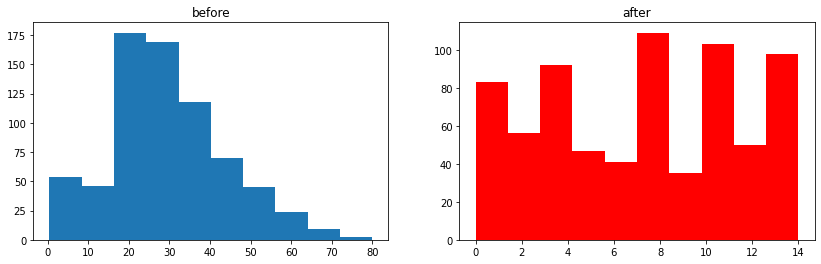

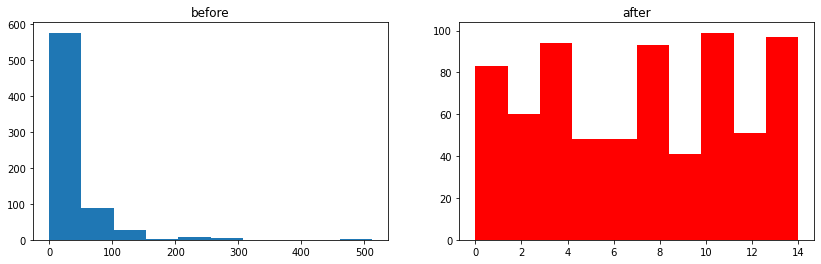

In [26]:
discretize(10,'uniform')